In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsRegressor
import geopandas as gpd
from keras import models
from keras import layers
import sklearn.metrics as metrics

/Users/Chanti/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.
/Users/Chanti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/Chanti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/Chanti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:457: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of num

In [2]:
zillow_df = pd.read_csv('Zip_Zhvi_2bedroom.csv')
zillow_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,93454,80532,Drake,CO,Fort Collins,Larimer,8942,NaN,NaN,NaN,...,270800,272200,274700,281300.0,286200,285300,284100,284800,285800,287500
8942,62556,12429,Port Ewen,NY,Kingston,Ulster,8943,64500.0,64000.0,63400.0,...,144500,144600,145600,146400.0,146600,147100,149100,151700,153300,153800
8943,99032,97028,Rhododendron,OR,Portland,Clackamas,8944,NaN,NaN,NaN,...,318200,315000,312300,308800.0,304700,302400,302300,303300,307400,312600
8944,58333,1338,Shelburne Falls,MA,Greenfield Town,Franklin,8945,91400.0,91000.0,90600.0,...,185700,184600,184800,188600.0,193000,195800,197600,198300,198300,198500


In [3]:
#Checking number of columns and column names
#Looks like we have 262 columns and a lot of the column names are just year and month separated by a hyphen
#Apart from that we also have Region ID, RegionName, City, State, Metro, CountyName and SizeRank
zillow_df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06'],
      dtype='object', length=262)

In [4]:
#Checking datatypes of columns. As expected, most of the numeric columns are of the type Integer
zillow_df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-02        int64
2017-03        int64
2017-04        int64
2017-05        int64
2017-06        int64
Length: 262, dtype: object

In [5]:
#Renaming column names and setting dtypes to float format
zillow_df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
zillow_df["ZipCode"]=zillow_df["ZipCode"].map(lambda x: "{:.0f}".format(x))
zillow_df["RegionID"]=zillow_df["RegionID"].map(lambda x: "{:.0f}".format(x))
zillow_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [6]:
zillow_df.dtypes

RegionID    object
ZipCode     object
City        object
State       object
Metro       object
             ...  
2017-02      int64
2017-03      int64
2017-04      int64
2017-05      int64
2017-06      int64
Length: 262, dtype: object

In [7]:
#Calculating median values of the dataframe
median_prices = zillow_df.median()
median_prices.head(10)

RegionID    77191.5
ZipCode     44404.0
SizeRank     4473.5
1996-04     84500.0
1996-05     84500.0
1996-06     84600.0
1996-07     84600.0
1996-08     84700.0
1996-09     84700.0
1996-10     84850.0
dtype: float64

In [8]:
#Selecting a few cities in California's Bay Area to plot trends in Median house costs
oc_df = zillow_df[zillow_df["CountyName"] == "San Mateo"].median()
sf_df = zillow_df[zillow_df["City"] == "San Francisco"].median()
palo_alto_df = zillow_df[zillow_df["City"] == "Palo Alto"].median()
df_comparison = pd.concat([oc_df, sf_df, palo_alto_df, median_prices], axis=1)
df_comparison.columns = ["San Mateo County", "San Francisco", "Palo Alto", "Median USA"]

In [9]:
cf.go_offline()
df_comparison.iplot(title="Bay Area Median Single Family Home Prices 1996-2017",
                    xTitle="Year",
                    yTitle="Sales Price",
                   #bestfit=True, bestfit_colors=["pink"],
                   #subplots=True,
                   shape=(4,1),
                    #subplot_titles=True,
                    fill=True,)

In [10]:
#Selecting a few cities in South Florida to perform the same analysis
md_df = zillow_df[zillow_df["CountyName"] == "Miami-Dade"].median()
miami_df = zillow_df[zillow_df["City"] == "Miami"].median()
tampa_df = zillow_df[zillow_df["City"] == "Tampa"].median()
df_comparison = pd.concat([md_df, miami_df, tampa_df, median_prices], axis=1)
df_comparison.columns = ["Miami-Dade County", "Miami", "Tampa", "Median USA"]

cf.go_offline()
df_comparison.iplot(title="South Florida Single Family Home Prices 1996-2017",
                    xTitle="Year",
                    yTitle="Sales Price",
                   #bestfit=True, bestfit_colors=["pink"],
                   #subplots=True,
                   shape=(4,1),
                    #subplot_titles=True,
                    fill=True,)

#We clearly notice the effects of the housing crisis that hit the housing market between 2008 and 2010 
#We also notice houses in South Florida on average, cost less than quarter of the price of houses in the Bay Area

In [11]:
columns_to_drop = ['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName']
df_numerical = zillow_df.dropna()
df_numerical = df_numerical.drop(columns_to_drop, axis=1)

In [12]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_numerical)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
print(len(kmeans.labels_))

5968


In [13]:
cluster_df = zillow_df.copy(deep=True)
cluster_df.dropna(inplace=True)
cluster_df.describe()
cluster_df['cluster'] = kmeans.labels_
cluster_df['appreciation_ratio'] = round(cluster_df["2017-06"]/cluster_df["1996-04"],2)
cluster_df['CityZipCodeAppRatio'] = cluster_df['City'].map(str) + "-" + cluster_df['ZipCode'] + "-" + cluster_df["appreciation_ratio"].map(str)
cluster_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,cluster,appreciation_ratio,CityZipCodeAppRatio
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,375300.0,378700,381400,381800,382100,383300,385100,0,2.30,Chicago-60657-2.3
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,405700.0,408300,408800,408000,410100,412200,412200,1,2.11,Chicago-60614-2.11
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82300.0,82500,83200,83900,84100,83900,83700,2,1.42,El Paso-79936-1.42
5,84640,60640,Chicago,IL,Chicago,Cook,6,123300.0,122600.0,122000.0,...,250800.0,252800,253800,253800,253400,254100,255100,0,2.07,Chicago-60640-2.07
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,336800.0,337400.0,337700.0,...,1258300.0,1262200,1253200,1244100,1241000,1244400,1245200,1,3.70,San Francisco-94109-3.7


In [14]:

plot_data = go.Scatter3d(
    x=cluster_df["appreciation_ratio"],
    y=cluster_df["1996-04"],
    z=cluster_df["2017-06"],
    mode='markers',
    text=cluster_df["CityZipCodeAppRatio"],
    marker=dict(
        size=12,
        color=cluster_df["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data = [plot_data]
layout = go.Layout(
    showlegend=False,
    title="USA real estate prices over last 30 years",
    scene = dict(
        xaxis = dict(title='X: Appreciation Ratio'),
        yaxis = dict(title="Y:  1996 Prices"),
        zaxis = dict(title="Z:  2017 Prices"),
    ),
    width=1000,
    height=800,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [15]:
neigh = KNeighborsRegressor(n_neighbors=2)

In [16]:
cluster_df.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
       '2017-06', 'cluster', 'appreciation_ratio', 'CityZipCodeAppRatio'],
      dtype='object', length=265)

In [17]:
cluster_df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,cluster,appreciation_ratio,CityZipCodeAppRatio
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,375300.0,378700,381400,381800,382100,383300,385100,0,2.30,Chicago-60657-2.3
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,405700.0,408300,408800,408000,410100,412200,412200,1,2.11,Chicago-60614-2.11
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82300.0,82500,83200,83900,84100,83900,83700,2,1.42,El Paso-79936-1.42
5,84640,60640,Chicago,IL,Chicago,Cook,6,123300.0,122600.0,122000.0,...,250800.0,252800,253800,253800,253400,254100,255100,0,2.07,Chicago-60640-2.07
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,336800.0,337400.0,337700.0,...,1258300.0,1262200,1253200,1244100,1241000,1244400,1245200,1,3.70,San Francisco-94109-3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,93425,80481,Ward,CO,Boulder,Boulder,8936,136300.0,133100.0,131400.0,...,344300.0,346200,355400,362500,359100,354600,356000,0,2.61,Ward-80481-2.61
8939,78867,47965,Crawfordsville,IN,Crawfordsville,Montgomery,8940,50900.0,51000.0,50000.0,...,71900.0,71800,70500,69100,68800,69400,70000,2,1.38,Crawfordsville-47965-1.38
8942,62556,12429,Port Ewen,NY,Kingston,Ulster,8943,64500.0,64000.0,63400.0,...,146400.0,146600,147100,149100,151700,153300,153800,2,2.38,Port Ewen-12429-2.38
8944,58333,1338,Shelburne Falls,MA,Greenfield Town,Franklin,8945,91400.0,91000.0,90600.0,...,188600.0,193000,195800,197600,198300,198300,198500,2,2.17,Shelburne Falls-1338-2.17


In [18]:
import plotly.express as px  
fig = px.choropleth(cluster_df,  # Input Pandas DataFrame
                    locations="State",  # DataFrame column with locations
                    color="1996-04",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings(April, 1996)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [19]:
fig = px.choropleth(cluster_df,  # Input Pandas DataFrame
                    locations="State",  # DataFrame column with locations
                    color="2017-06",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings (June, 2017)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show() 

In [20]:
df_SF=cluster_df[cluster_df['City'].str.match('San Francisco')]
df_SF

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,cluster,appreciation_ratio,CityZipCodeAppRatio
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,336800.0,337400.0,337700.0,...,1258300.0,1262200,1253200,1244100,1241000,1244400,1245200,1,3.70,San Francisco-94109-3.7
247,97576,94122,San Francisco,CA,San Francisco,San Francisco,248,258800.0,261900.0,263200.0,...,1097400.0,1111400,1123600,1142100,1159200,1172800,1184400,1,4.58,San Francisco-94122-4.58
404,97567,94112,San Francisco,CA,San Francisco,San Francisco,405,202000.0,200300.0,201100.0,...,833400.0,835500,838400,847200,858300,871200,882100,1,4.37,San Francisco-94112-4.37
623,97569,94115,San Francisco,CA,San Francisco,San Francisco,624,316600.0,313500.0,311200.0,...,1244500.0,1246600,1250800,1265900,1277700,1279200,1279400,1,4.04,San Francisco-94115-4.04
759,97575,94121,San Francisco,CA,San Francisco,San Francisco,760,287900.0,289200.0,290400.0,...,1132300.0,1132800,1138100,1155000,1176900,1198400,1213500,1,4.22,San Francisco-94121-4.22
880,97557,94102,San Francisco,CA,San Francisco,San Francisco,881,237800.0,232000.0,229200.0,...,1072100.0,1071200,1061600,1057900,1058000,1056500,1058500,1,4.45,San Francisco-94102-4.45
881,97572,94118,San Francisco,CA,San Francisco,San Francisco,882,298100.0,301300.0,302100.0,...,1244500.0,1248000,1251900,1268600,1289400,1303300,1310300,1,4.40,San Francisco-94118-4.4
1373,97562,94107,San Francisco,CA,San Francisco,San Francisco,1374,273300.0,276600.0,272400.0,...,1255100.0,1264100,1273400,1278000,1275300,1272100,1270400,1,4.65,San Francisco-94107-4.65
1720,97558,94103,San Francisco,CA,San Francisco,San Francisco,1721,234100.0,231500.0,231100.0,...,1150300.0,1163600,1164000,1161400,1164500,1168000,1165500,1,4.98,San Francisco-94103-4.98
2031,97585,94131,San Francisco,CA,San Francisco,San Francisco,2032,278400.0,288000.0,292900.0,...,1255200.0,1255700,1248800,1247100,1252000,1256500,1259000,1,4.52,San Francisco-94131-4.52


In [21]:
df_SF_prices = df_SF.iloc[:,7:262]
df_SF_prices.index = df_SF[['ZipCode']]
df_SF_prices

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
"(94109,)",336800.0,337400.0,337700.0,338200.0,339700.0,340400.0,339700.0,338900.0,338300.0,340000.0,...,1239400,1238800,1246800,1258300.0,1262200,1253200,1244100,1241000,1244400,1245200
"(94122,)",258800.0,261900.0,263200.0,264000.0,265000.0,266200.0,268100.0,270100.0,271600.0,273800.0,...,1058400,1059300,1075200,1097400.0,1111400,1123600,1142100,1159200,1172800,1184400
"(94112,)",202000.0,200300.0,201100.0,201000.0,198700.0,196600.0,196300.0,197500.0,199500.0,201400.0,...,818200,818800,826200,833400.0,835500,838400,847200,858300,871200,882100
"(94115,)",316600.0,313500.0,311200.0,310800.0,309900.0,308200.0,306300.0,305700.0,307500.0,310000.0,...,1214600,1219300,1231800,1244500.0,1246600,1250800,1265900,1277700,1279200,1279400
"(94121,)",287900.0,289200.0,290400.0,290900.0,291500.0,291800.0,292800.0,295000.0,298200.0,301300.0,...,1110400,1113800,1124900,1132300.0,1132800,1138100,1155000,1176900,1198400,1213500
"(94102,)",237800.0,232000.0,229200.0,228100.0,229500.0,231800.0,234000.0,235900.0,239000.0,240900.0,...,1014400,1025700,1049900,1072100.0,1071200,1061600,1057900,1058000,1056500,1058500
"(94118,)",298100.0,301300.0,302100.0,300500.0,300100.0,302000.0,302500.0,301900.0,302000.0,304900.0,...,1220400,1218800,1230400,1244500.0,1248000,1251900,1268600,1289400,1303300,1310300
"(94107,)",273300.0,276600.0,272400.0,268900.0,269100.0,269800.0,270200.0,270900.0,275600.0,283400.0,...,1243800,1242400,1246700,1255100.0,1264100,1273400,1278000,1275300,1272100,1270400
"(94103,)",234100.0,231500.0,231100.0,231500.0,232800.0,234000.0,236800.0,240400.0,243500.0,245000.0,...,1097400,1105100,1128800,1150300.0,1163600,1164000,1161400,1164500,1168000,1165500
"(94131,)",278400.0,288000.0,292900.0,296300.0,300200.0,300900.0,299700.0,299500.0,299900.0,301000.0,...,1244200,1237500,1243100,1255200.0,1255700,1248800,1247100,1252000,1256500,1259000


In [22]:
y = df_SF_prices[['2017-06']]

#Slecting target variable and converting it to a numpy array for future use
y_array = np.asarray(y)
y_array

array([[1245200],
       [1184400],
       [ 882100],
       [1279400],
       [1213500],
       [1058500],
       [1310300],
       [1270400],
       [1165500],
       [1259000],
       [1275600],
       [ 796700],
       [ 872700],
       [1267100],
       [1347200]])

In [23]:
#Selecting columns for the plot and storing them in a new variable
df_94109 = df_SF_prices.iloc[0:1,]
df_94109

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
"(94109,)",336800.0,337400.0,337700.0,338200.0,339700.0,340400.0,339700.0,338900.0,338300.0,340000.0,...,1239400,1238800,1246800,1258300.0,1262200,1253200,1244100,1241000,1244400,1245200


In [24]:
df_transposed = df_94109.transpose()
df_transposed

,"(94109,)"
1996-04,336800.0
1996-05,337400.0
1996-06,337700.0
1996-07,338200.0
1996-08,339700.0
...,...
2017-02,1253200.0
2017-03,1244100.0
2017-04,1241000.0
2017-05,1244400.0


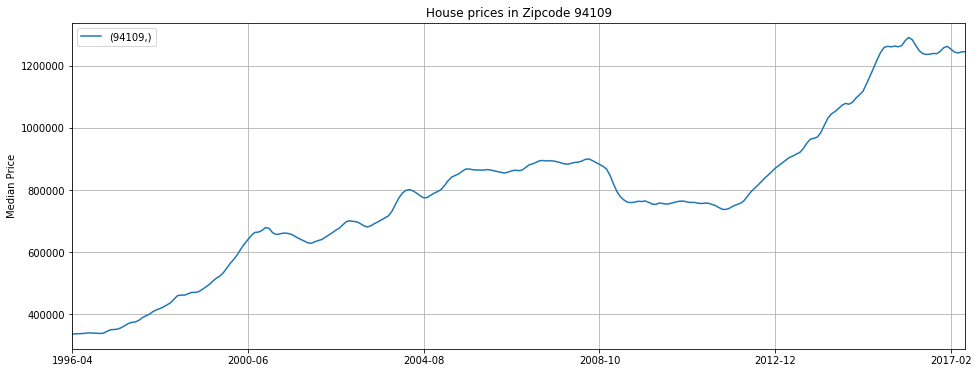

In [25]:
#Plotting Median Price for all years in ZipCode 94109
from matplotlib import pyplot as plt
%matplotlib inline

df_transposed.plot(figsize=(16, 6), grid=True)
plt.title('House prices in Zipcode 94109')
plt.ylabel('Median Price')
plt.show()

In [26]:
#Splitting data into Training and Testing sets
#We will use the first 200 rows (roughly 78%) for the training set and last 55 rows (roughly 22%)for the test set
trainDF = df_transposed.iloc[0:200]
testDF = df_transposed.iloc[200:255]

In [27]:
trainDF.shape

(200, 1)

In [28]:
testDF.shape

(55, 1)

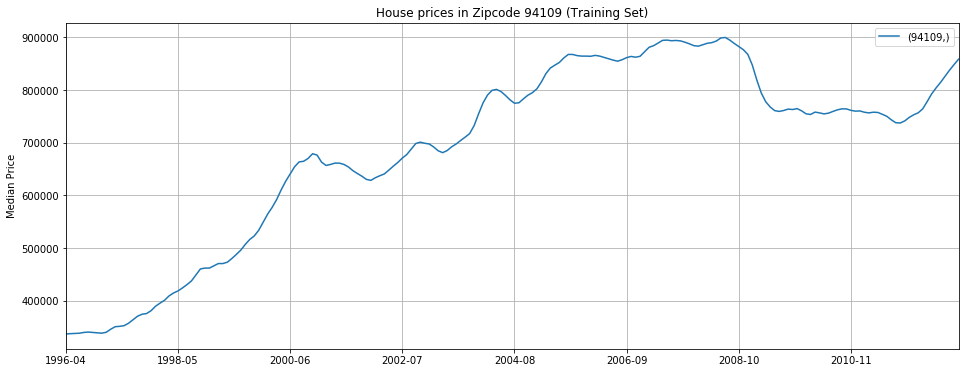

In [29]:
#Plotting trainDF
trainDF.plot(figsize=(16, 6), grid=True)
plt.title('House prices in Zipcode 94109 (Training Set)')
plt.ylabel('Median Price')
plt.show()

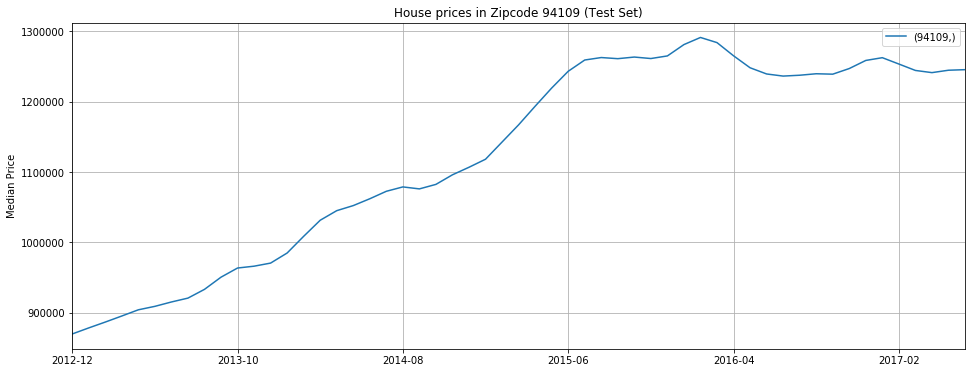

In [30]:
#Plotting testDF
testDF.plot(figsize=(16, 6), grid=True)
plt.title('House prices in Zipcode 94109 (Test Set)')
plt.ylabel('Median Price')
plt.show()

In [31]:
trainArray = np.array(trainDF)
testArray = np.array(testDF)

In [32]:
#Fitting the minMax Scaler to training array to bring all values to a range between 0 and 1
minMaxScale = MinMaxScaler()
minMaxScale.fit(trainArray)
trainingArray = minMaxScale.transform(trainArray)
#Printing first five values of the scaled training array
trainingArray[0:5]

array([[0.        ],
       [0.00106572],
       [0.00159858],
       [0.00248668],
       [0.00515098]])

In [33]:
#Fitting the minMax Scaler to testing array to bring all values to a range between 0 and 1
minMaxScale = MinMaxScaler()
minMaxScale.fit(testArray)
testingArray = minMaxScale.transform(testArray)
#Printing first five values of the scaled testing array
testingArray[0:5]

array([[0.        ],
       [0.02043726],
       [0.0401616 ],
       [0.06059886],
       [0.08151141]])

In [34]:
xtrain = trainingArray
xtest = testingArray
ytrain = trainingArray
ytest = testingArray

In [35]:
print('xtrain shape = {}'.format(xtrain.shape))
print('xtest shape = {}'.format(xtest.shape))
print('ytrain shape = {}'.format(ytrain.shape))
print('ytest shape = {}'.format(ytest.shape))

xtrain shape = (200, 1)
xtest shape = (55, 1)
ytrain shape = (200, 1)
ytest shape = (55, 1)


In [36]:
#Defining the LSTM model using the Keras Sequential functions
model = models.Sequential()
model.add(layers.LSTM(1, input_shape=(1, 1)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
#Transforming xtrain and ytrain into 3-dimensional arrays 
xtrain = xtrain.reshape((xtrain.shape[0], 1, xtrain.shape[1]))
xtest = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))

In [38]:
#Printing shape of the transformed arrays
print ('The shape of xtrain is{}: '.format(xtrain.shape))
print ('The shape of xtest is{}: '.format(xtest.shape))

The shape of xtrain is(200, 1, 1): 
The shape of xtest is(55, 1, 1): 


In [39]:
loss = model.fit(xtrain, ytrain, batch_size=10, epochs=100)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4582
Epoch 2/100
200/200 [==============================] - 0s 332us/step - loss: 0.4091
Epoch 3/100
200/200 [==============================] - 0s 339us/step - loss: 0.3626
Epoch 4/100
200/200 [==============================] - 0s 336us/step - loss: 0.3177
Epoch 5/100
200/200 [==============================] - 0s 535us/step - loss: 0.2759
Epoch 6/100
200/200 [==============================] - 0s 712us/step - loss: 0.2371
Epoch 7/100
200/200 [==============================] - 0s 490us/step - loss: 0.2009
Epoch 8/100
200/200 [==============================] - 0s 387us/step - loss: 0.1692
Epoch 9/100
200/200 [==============================] - 0s 398us/step - loss: 0.1413
Epoch 10/100
200/200 [==============================] - 0s 427us/step - loss: 0.1176
Epoch 11/100
200/200 [==============================] - 0s 381us/step - loss: 0.0973
Epoch 12/100
200/200 [==============================] - 0s 377us/step - loss

200/200 [==============================] - 0s 410us/step - loss: 0.0011
Epoch 98/100
200/200 [==============================] - 0s 404us/step - loss: 0.0011
Epoch 99/100
200/200 [==============================] - 0s 347us/step - loss: 0.0010
Epoch 100/100
200/200 [==============================] - 0s 345us/step - loss: 9.9007e-04


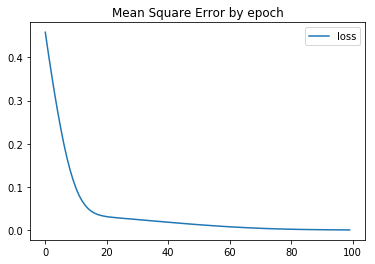

In [40]:
#Plotting Mean Squared Error by epoch
plt.plot(loss.history['loss'], label = 'loss')
plt.title('Mean Square Error by epoch')
plt.legend()
plt.show()

In [41]:
predicted = model.predict(xtest)

In [42]:
combined_array = np.concatenate((ytest, predicted), axis = 1)

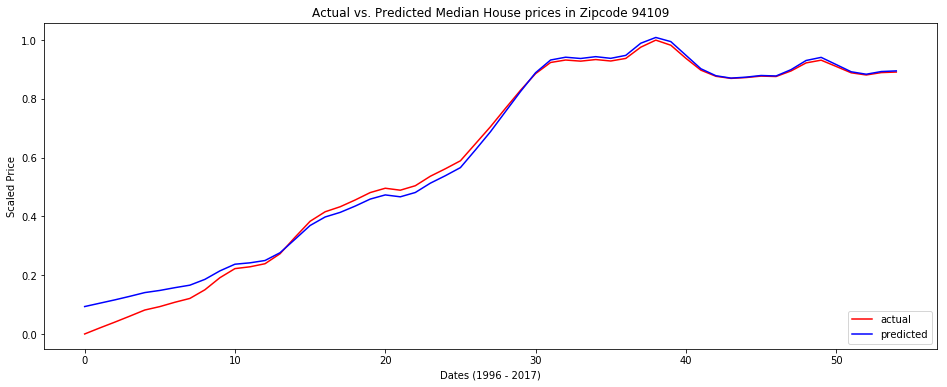

In [43]:
plt.figure(figsize=(16,6))
plt.plot(combined_array[:,0],color='red', label='actual')
plt.plot(combined_array[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('Actual vs. Predicted Median House prices in Zipcode 94109')
plt.xlabel('Dates (1996 - 2017)')
plt.ylabel('Scaled Price')
plt.show()

In [44]:
#Getting mean squared error of the model
np.sqrt(metrics.mean_squared_error(ytest,predicted))

0.029166809386064047

In [45]:
#Model error is 2.91% which implies model accuracy is 97.09%

In [46]:
#References:

#1) https://www.kaggle.com/masumrumi/zillow-an-analysis-with-visualizations
#2) https://blog.dominodatalab.com/exploring-us-real-estate-values-with-python/